### Project 1 - Analysing Seattle and Boston Airbnb datasets
#### In this project we will try to answer this 4 folowing questions:
1) When there is more or less availability in Seattle and Boston? Is there a difference in the two cities?<br>
2) When there is cheaper or more expensive to stay in Seattle and Boston? Is there a difference in the two cities?<br>
3) Do neighborhoods influence prices? And the score rating?<br>
4) What features do the top rated properties have in common? What is different from the other properties?

#### In this notebook, we will answer 2) questions

In [1]:
import pandas as pd

In [2]:
# import data
df_boston_calendar = pd.read_csv('./airbnb-boston/calendar.csv')
df_seattle_calendar = pd.read_csv('./airbnb-seattle/calendar.csv')

#### Analyzing Boston data:

In [11]:
# looking into data
df_boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [12]:
df_boston_calendar[df_boston_calendar['available']=='t'].describe(include='all')

,listing_id,date,available,price
count,6.430370e+05,643037,643037,643037
unique,NaN,365,1,1246
top,NaN,2016-12-04,t,$150.00
freq,NaN,2207,643037,20752
mean,7.699288e+06,NaN,NaN,NaN
std,4.766178e+06,NaN,NaN,NaN
min,3.353000e+03,NaN,NaN,NaN
25%,3.616081e+06,NaN,NaN,NaN
50%,7.789055e+06,NaN,NaN,NaN
75%,1.228796e+07,NaN,NaN,NaN


In [13]:
# filters the dataset keeping the rows with availability = 't'
df_boston_values = df_boston_calendar[df_boston_calendar['available']=='t']

In [14]:
# convert price in float
df_boston_values['price'] = df_boston_values['price'].str.replace(',','').str.replace('$','').astype('float')
df_boston_values.dtypes

<ipython-input-14-2ca909ea771b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boston_values['price'] = df_boston_values['price'].str.replace(',','').str.replace('$','').astype('float')


listing_id      int64
date           object
available      object
price         float64
dtype: object

In [15]:
# convert date in datetime
df_boston_values['date'] = pd.to_datetime(df_boston_values['date'])
df_boston_values.dtypes

<ipython-input-15-b09e76752eea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boston_values['date'] = pd.to_datetime(df_boston_values['date'])


listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [17]:
# calculate the average price of properties per day
df_daily_boston = df_boston_values[['date','price']].groupby('date').mean()
df_daily_boston.head()

,price
date,
2016-09-06,241.043860
2016-09-07,251.833691
2016-09-08,251.748749
2016-09-09,261.859327
2016-09-10,266.847280


<AxesSubplot:xlabel='date'>

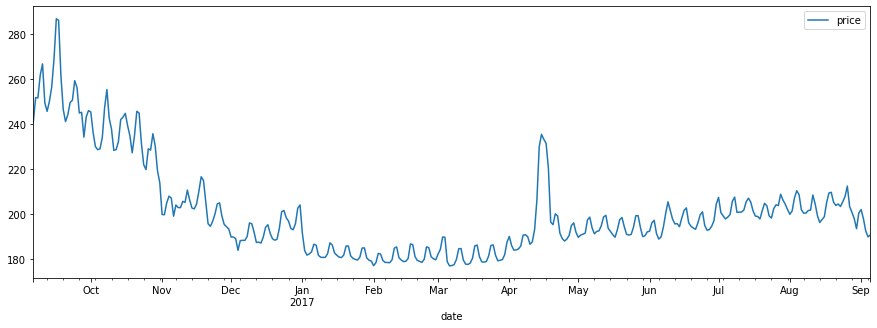

In [18]:
df_daily_boston.plot.line(figsize=(15,5))

In [37]:
# look at the day with the highest average price 
df_daily_boston[df_daily_boston['price'] == max(df_daily_boston['price'])]

,price
date,
2016-09-16,286.921977


In [36]:
# look at the day with the lowest average price
df_daily_boston[df_daily_boston['price'] == min(df_daily_boston['price'])]

,price
date,
2017-03-06,177.023002


- We can see that the average prices start at the highest level of the series and falls until it reaches the lowest level in February
- The highest average price happens in September, when it reaches \$ 286
- The lowest average price happens in March, when it reaches \$ 177
- There is a peak in average prices at the end of April, which may be explained by the Boston marathon (https://en.wikipedia.org/wiki/2017_Boston_Marathon)

In [19]:
# create a new column with the weekday name of the date
df_boston_values['week_day'] = df_boston_values["date"].dt.weekday.astype(str)+'-'+df_boston_values["date"].dt.day_name()

<ipython-input-19-e728880ccd27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boston_values['week_day'] = df_boston_values["date"].dt.weekday.astype(str)+'-'+df_boston_values["date"].dt.day_name()


In [22]:
# calculate percentage of availability per week day
df_week_day_boston = df_boston_values[['week_day','price']].groupby('week_day').mean()

<AxesSubplot:xlabel='week_day'>

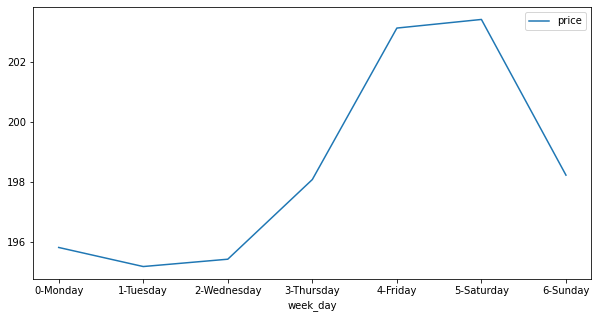

In [23]:
df_week_day_boston.plot.line(figsize=(10,5))

- The highest average prices are Friday and Saturday
- The lowest average prices are Tuesday and Wednesday

#### Analyzing Seattle data:

In [25]:
# looking into data
df_seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [26]:
df_seattle_calendar[df_seattle_calendar['available']=='t'].describe(include='all')

,listing_id,date,available,price
count,9.345420e+05,934542,934542,934542
unique,NaN,365,1,669
top,NaN,2017-01-01,t,$150.00
freq,NaN,2922,934542,36646
mean,5.305517e+06,NaN,NaN,NaN
std,2.974821e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,2.875975e+06,NaN,NaN,NaN
50%,5.615620e+06,NaN,NaN,NaN
75%,7.873345e+06,NaN,NaN,NaN


In [27]:
# filters the dataset keeping the rows with availability = 't'
df_seattle_values = df_seattle_calendar[df_seattle_calendar['available']=='t']

In [28]:
# convert price in float
df_seattle_values['price'] = df_seattle_values['price'].str.replace(',','').str.replace('$','').astype('float')
df_seattle_values.dtypes

<ipython-input-28-cc23c98b8790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seattle_values['price'] = df_seattle_values['price'].str.replace(',','').str.replace('$','').astype('float')


listing_id      int64
date           object
available      object
price         float64
dtype: object

In [29]:
# convert date in datetime
df_seattle_values['date'] = pd.to_datetime(df_seattle_values['date'])
df_seattle_values.dtypes

<ipython-input-29-98a8a6e124a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seattle_values['date'] = pd.to_datetime(df_seattle_values['date'])


listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [30]:
# calculate the average price of properties per day
df_daily_seattle = df_seattle_values[['date','price']].groupby('date').mean()#.reset_index()
df_daily_seattle.head()

,price
date,
2016-01-04,122.085879
2016-01-05,120.681307
2016-01-06,120.928258
2016-01-07,120.958896
2016-01-08,127.640853


<AxesSubplot:xlabel='date'>

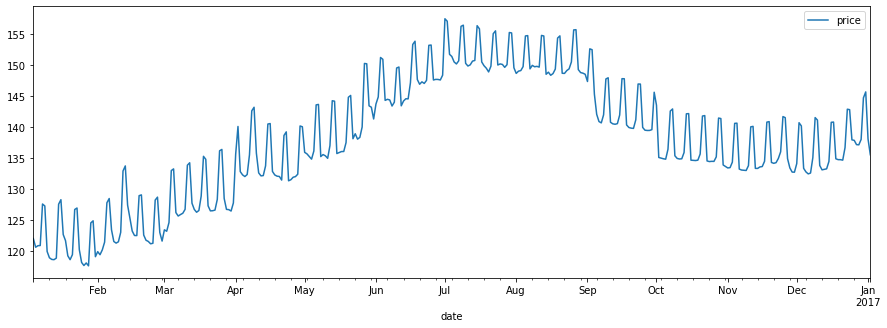

In [31]:
df_daily_seattle.plot.line(figsize=(15,5))

In [38]:
# look at the day with the highest average price 
df_daily_seattle[df_daily_seattle['price'] == max(df_daily_seattle['price'])]

,price
date,
2016-07-01,157.48


In [39]:
# look at the day with the lowest average price
df_daily_seattle[df_daily_seattle['price'] == min(df_daily_seattle['price'])]

,price
date,
2016-01-28,117.685413


- We can see that the average prices start at the lowest level of the series and grow until reaching the highest level in July
- The highest average price happens in July, when it reaches \$ 157
- The lowest average price happens in March, when it reaches \$ 117

In [32]:
df_seattle_values['week_day'] = df_seattle_values["date"].dt.weekday.astype(str)+'-'+df_seattle_values["date"].dt.day_name()

<ipython-input-32-412f9aee2b3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seattle_values['week_day'] = df_seattle_values["date"].dt.weekday.astype(str)+'-'+df_seattle_values["date"].dt.day_name()


In [33]:
# calculate percentage of availability per week day
df_week_day_seattle = df_seattle_values[['week_day','price']].groupby('week_day').mean()

<AxesSubplot:xlabel='week_day'>

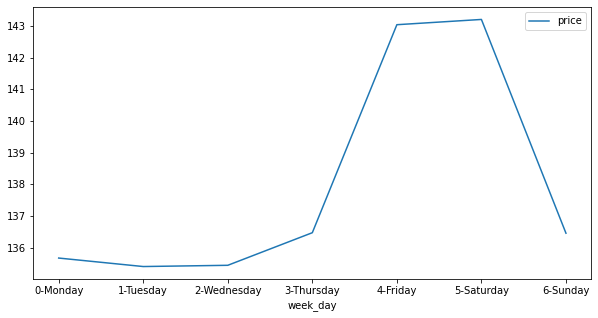

In [34]:
df_week_day_seattle.plot.line(figsize=(10,5))

- The highest average prices are Friday and Saturday
- The lowest average prices are Tuesday and Wednesday

#### Comparing Boston and Seattle:

Analyzing the daily rate, the curves behave very similarly:
- The lowest average prices between January and March
- The highest average prices between August and October in Boston and between July and September in Seattle

The main differences are:
- Boston has more pronounced declines at the beginning of the series
- Seattle has a more stable standard
- There is a spike in Boston price at the end of April in Boston that may be explained by the Boston marathon(https://en.wikipedia.org/wiki/2017_Boston_Marathon)
- On average Seattle is reasonably cheaper than Boston: The highest average Seattle price is less than the lowest average Boston price

Analyzing the rate per day of the week, we observe that:
- The price variation is very similar. Friday and Saturday as the days with the highest average price and Tuesday and Wednesday with the lowest average price.